In [196]:
import pandas as pd
import os
import numpy as np
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import sklearn.preprocessing as preproc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import statsmodels.api as sm

sns.set_style('whitegrid')

DATA_PATH = 'WineData/'
def load_Wine_data(data_path,fileName): 
    csv_path = os.path.join(data_path, fileName) 
    try:
        return pd.read_csv(csv_path, sep=';')
    except:
        print("Given File not available..Please check you entered the correct fine name...!")

### Loding Data from CSV to DataFrame

In [103]:
WhiteWineData = load_Wine_data(DATA_PATH,'winequality-white.csv')
RedWineData = load_Wine_data(DATA_PATH,'winequality-red.csv')

In [104]:
WhiteWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [105]:
RedWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### White Wine EDA for Regression Model

In [106]:
WhiteWineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [107]:
WhiteWineData.shape

(4898, 12)

In [108]:
WhiteWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Checking the Data Types of all feature

In [109]:
WhiteWineData.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [110]:
WhiteWineData.quality.value_counts() #Checking the different occurance of Target value

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [111]:
#WhiteWineData[(WhiteWineData.quality==9) | (WhiteWineData.quality==8)]
WhiteWineData[(WhiteWineData.quality==9) ]#checking is there any pattern for high quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2dd28e48>,
      dtype=object)

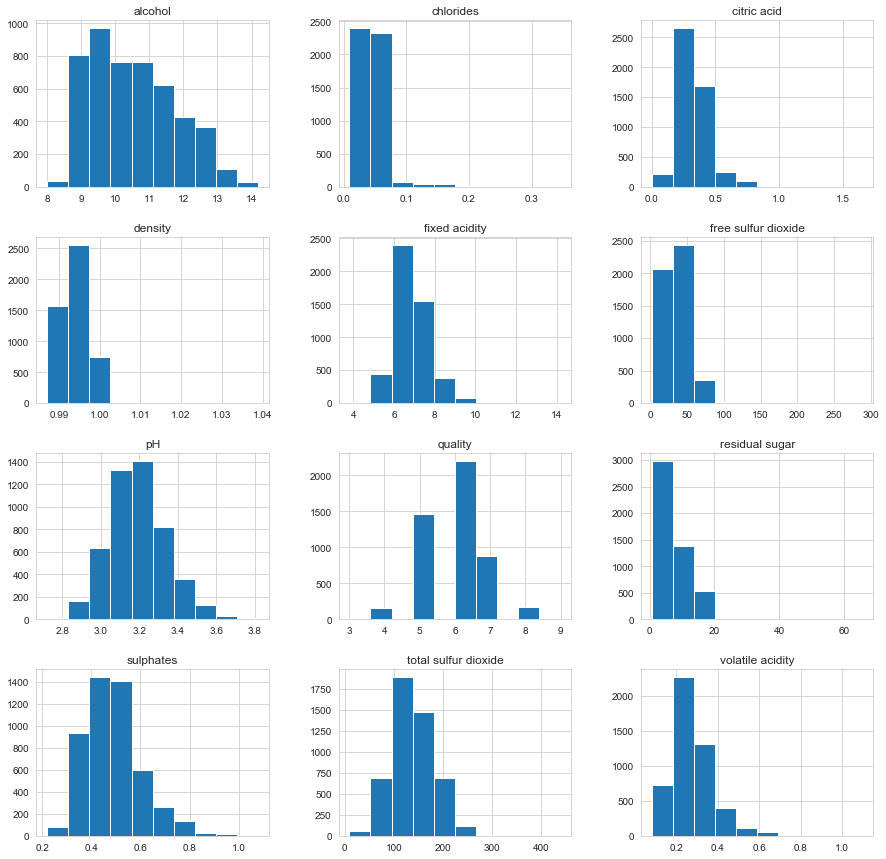

In [112]:
WhiteWineData.hist(figsize=(15,15))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


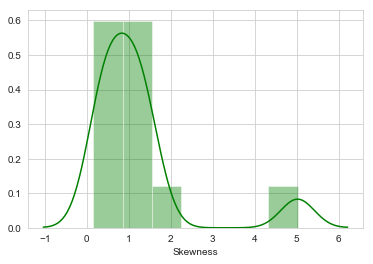

In [113]:
sns.distplot(WhiteWineData.skew(),color='green',axlabel ='Skewness')

plt.show()

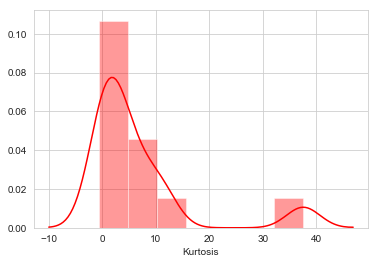

In [114]:
sns.distplot(WhiteWineData.kurtosis(),color='red',axlabel ='Kurtosis')

In [115]:
WhiteWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [116]:
WhiteWineData.isna().sum() #Checking if there any Value missing which need require Imputation. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

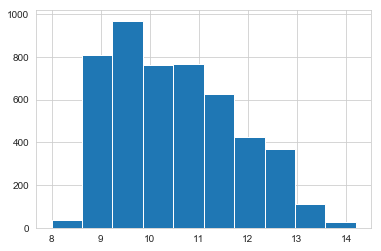

In [117]:
WhiteWineData.alcohol.hist()

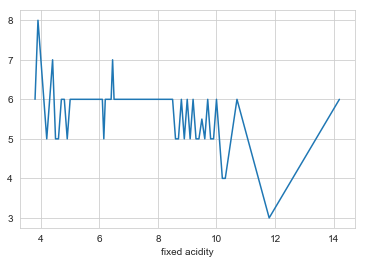

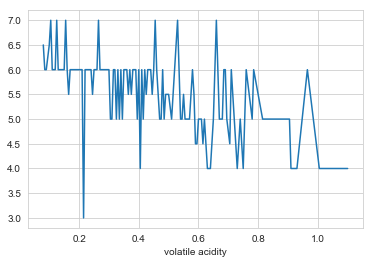

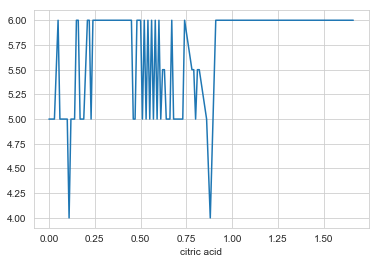

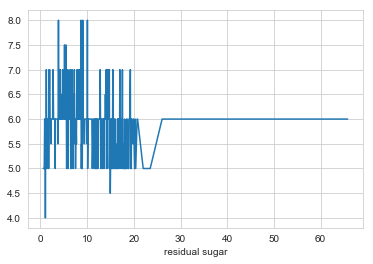

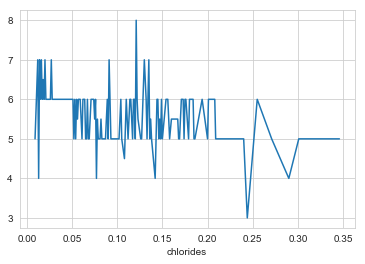

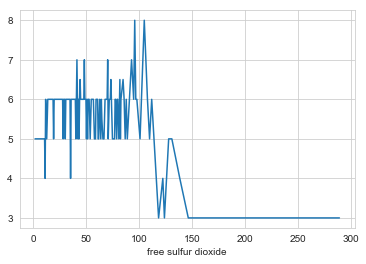

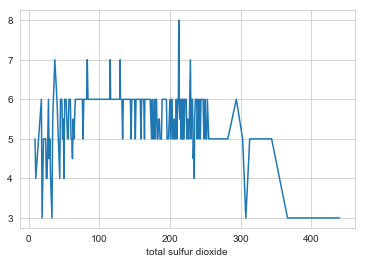

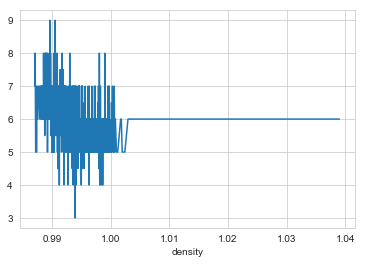

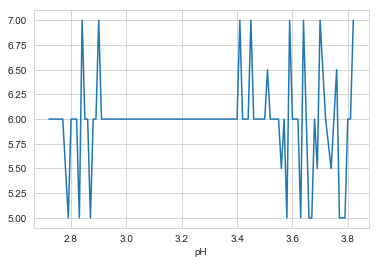

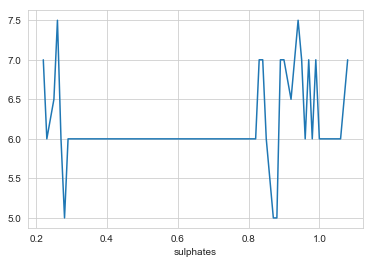

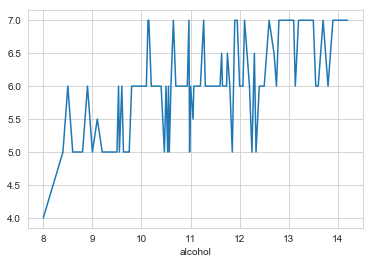

In [118]:
for column in WhiteWineData:
    if(column!='quality'):
        WhiteWineData.groupby(by=[column])['quality'].median().plot()
        plt.show()

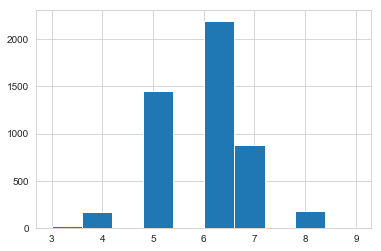

In [119]:

WhiteWineData['quality'].hist()

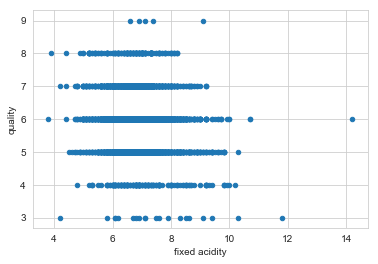

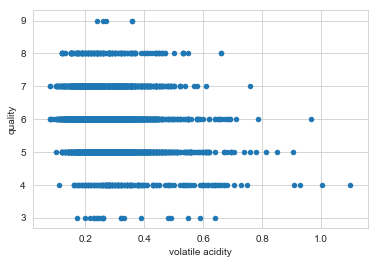

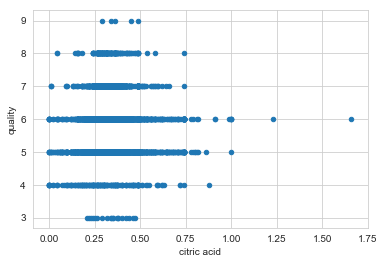

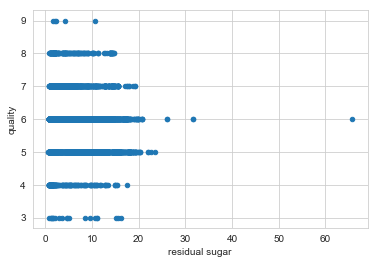

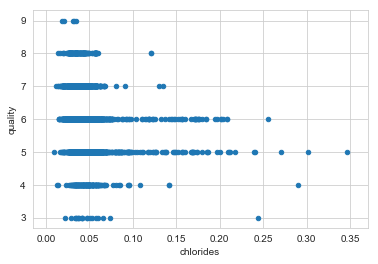

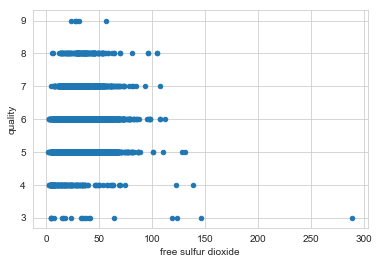

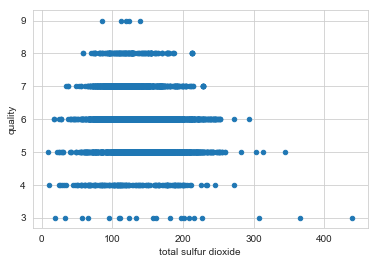

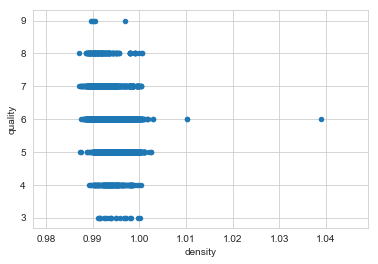

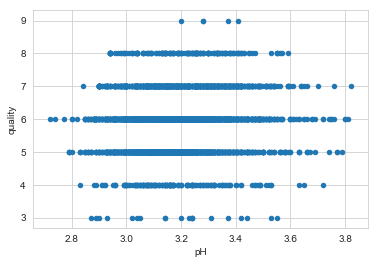

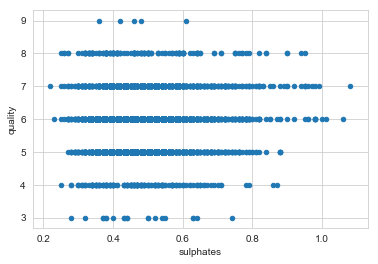

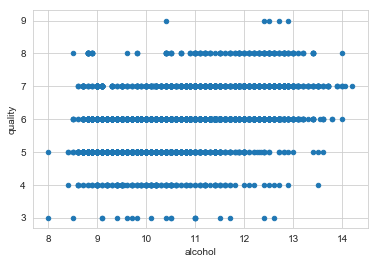

In [120]:
for column in WhiteWineData:
    if(column!='quality'):
        WhiteWineData.plot(kind='scatter', x= column, y='quality')
        plt.show()


In [121]:
WhiteWineData['total sulfur dioxide_stand'] = preproc.StandardScaler().fit_transform(WhiteWineData[['total sulfur dioxide']])
WhiteWineData['total sulfur dioxide_MinMax'] = preproc.minmax_scale(WhiteWineData[['total sulfur dioxide']])

In [122]:
WhiteWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxide_stand,total sulfur dioxide_MinMax
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4.898000e+03,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.057636e-16,0.300141
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,1.000102e+00,0.098603
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,-3.044230e+00,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,-7.144739e-01,0.229698
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,-1.026189e-01,0.290023
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,6.739664e-01,0.366589
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,7.098444e+00,1.000000


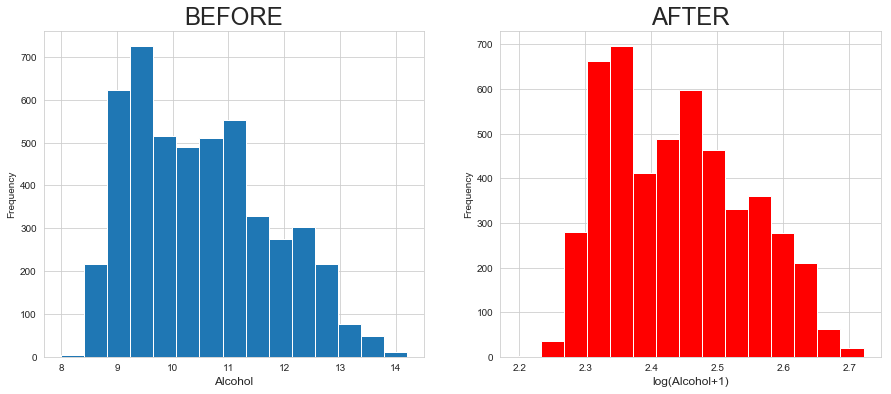

In [123]:
# Plot Fare Price Distribution
plt.subplot(1, 2, 1)
(WhiteWineData['alcohol']).plot.hist(bins=15, figsize=(15, 6), edgecolor = 'white')
plt.xlabel('Alcohol', fontsize=12)
plt.title('BEFORE', fontsize=24)

#Plot Log Fare Price Distribution
plt.subplot(1, 2, 2)
np.log(WhiteWineData['alcohol']+1).plot.hist(bins=15,figsize=(15,6), edgecolor='white', color='r')
plt.xlabel('log(Alcohol+1)', fontsize=12)
plt.title('AFTER', fontsize=24)

plt.show()

In [124]:
WhiteWineData['Alcohol_log'] = WhiteWineData['alcohol']+1

In [125]:
WhiteWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxide_stand,total sulfur dioxide_MinMax,Alcohol_log
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4.898000e+03,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.057636e-16,0.300141,11.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,1.000102e+00,0.098603,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,-3.044230e+00,0.000000,9.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,-7.144739e-01,0.229698,10.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,-1.026189e-01,0.290023,11.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,6.739664e-01,0.366589,12.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,7.098444e+00,1.000000,15.200000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a33c442b0>,
      dtype=object)

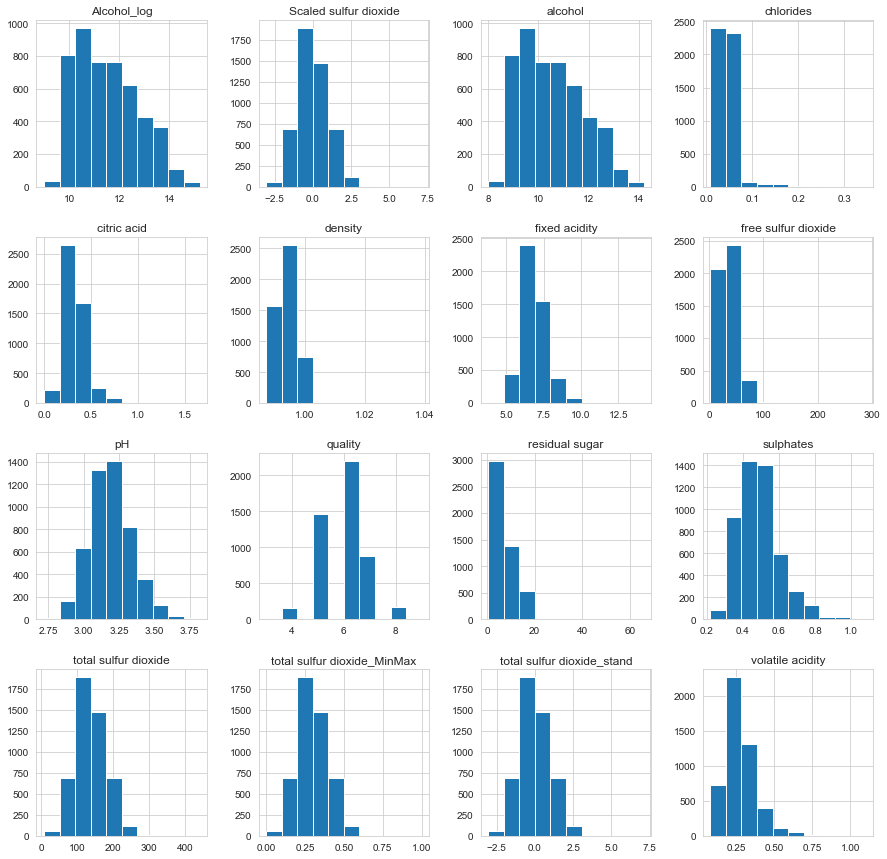

In [91]:
WhiteWineData.hist(figsize=(15,15))

### Correlation Matrix plots
A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap

In [126]:
corr_matrix = WhiteWineData.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                        1.000000
Alcohol_log                    0.435575
alcohol                        0.435575
pH                             0.099427
sulphates                      0.053678
free sulfur dioxide            0.008158
citric acid                   -0.009209
residual sugar                -0.097577
fixed acidity                 -0.113663
total sulfur dioxide          -0.174737
total sulfur dioxide_MinMax   -0.174737
total sulfur dioxide_stand    -0.174737
volatile acidity              -0.194723
chlorides                     -0.209934
density                       -0.307123
Name: quality, dtype: float64

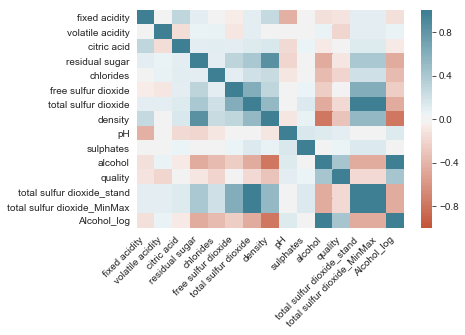

In [127]:
corr = WhiteWineData.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [129]:
dropFeature = ['alcohol','total sulfur dioxide','total sulfur dioxide_stand']
# flight_data_copy.drop(['TailNum', 'OriginStateFips', 
#                 'DestStateFips', 'Diverted'], axis=1, inplace=True)

#### Removing irrelavent feature

In [130]:
WhiteWineData.drop(dropFeature, axis=1,inplace=True)

In [131]:
WhiteWineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'quality', 'total sulfur dioxide_MinMax', 'Alcohol_log'],
      dtype='object')

In [133]:
WhiteWineData.shape

(4898, 12)

#### Splitting train and test Data

In [136]:
# With sklearn train_test_split
np.random.seed(42)
wine_train_set, wine_test_set = train_test_split(WhiteWineData, test_size=0.2, random_state=42)

print(len(wine_train_set), "train +", len(wine_test_set), "test")

wine_test_set.head()

3918 train + 980 test


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality,total sulfur dioxide_MinMax,Alcohol_log
4656,6.0,0.29,0.41,10.8,0.048,55.0,0.99370,3.09,0.59,7,0.324826,11.966667
3659,5.4,0.53,0.16,2.7,0.036,34.0,0.98856,3.20,0.53,8,0.276102,14.200000
907,7.1,0.25,0.39,2.1,0.036,30.0,0.99080,3.28,0.43,8,0.266821,13.200000
4352,7.3,0.28,0.35,1.6,0.054,31.0,0.99178,3.18,0.47,5,0.322506,11.700000
3271,6.5,0.32,0.34,5.7,0.044,27.0,0.99184,3.28,0.60,7,0.190255,13.000000


In [139]:
wine_test_set.quality.value_counts()

6    432
5    291
7    192
8     35
4     25
3      5
Name: quality, dtype: int64

In [137]:
wine_train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality,total sulfur dioxide_MinMax,Alcohol_log
4665,7.3,0.17,0.36,8.20,0.028,44.0,0.99272,3.14,0.41,6,0.236659,13.4
1943,6.3,0.25,0.44,11.60,0.041,48.0,0.99680,3.18,0.52,5,0.431555,10.5
3399,5.6,0.32,0.33,7.40,0.037,25.0,0.99268,3.25,0.49,6,0.199536,12.1
843,6.9,0.19,0.35,1.70,0.036,33.0,0.99315,3.21,0.54,7,0.213457,11.8
2580,7.7,0.30,0.26,18.95,0.053,36.0,0.99976,3.20,0.50,5,0.382831,11.4


In [140]:
wine_train_set.quality.value_counts()

6    1766
5    1166
7     688
8     140
4     138
3      15
9       5
Name: quality, dtype: int64

#### Removing Target Data from both Training and test set

In [141]:
wine_train_set_Y=wine_train_set.quality

In [142]:
wine_train_set_Y.shape

(3918,)

In [143]:
wine_train_set_Y.head()

4665    6
1943    5
3399    6
843     7
2580    5
Name: quality, dtype: int64

In [146]:
wine_train_set_X=wine_train_set.drop('quality',axis=1)

In [149]:
wine_train_set_X.shape

(3918, 11)

In [153]:
wine_train_set_X.loc[4665]## Checking any specific sample still matched with X and Y

fixed acidity                   7.300000
volatile acidity                0.170000
citric acid                     0.360000
residual sugar                  8.200000
chlorides                       0.028000
free sulfur dioxide            44.000000
density                         0.992720
pH                              3.140000
sulphates                       0.410000
total sulfur dioxide_MinMax     0.236659
Alcohol_log                    13.400000
Name: 4665, dtype: float64

In [154]:
wine_train_set.loc[4665]

fixed acidity                   7.300000
volatile acidity                0.170000
citric acid                     0.360000
residual sugar                  8.200000
chlorides                       0.028000
free sulfur dioxide            44.000000
density                         0.992720
pH                              3.140000
sulphates                       0.410000
quality                         6.000000
total sulfur dioxide_MinMax     0.236659
Alcohol_log                    13.400000
Name: 4665, dtype: float64

In [156]:
wine_test_set_Y=wine_test_set.quality
wine_test_set_X=wine_test_set.drop('quality',axis=1)

In [157]:
wine_test_set_Y.shape

(980,)

In [158]:
wine_test_set_X.shape

(980, 11)

### Model Selection

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(wine_train_set_X, wine_train_set_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
[lin_reg.coef_]

[array([ 4.59072370e-02, -1.91488432e+00, -6.13034698e-02,  7.12395507e-02,
        -2.64751329e-02,  5.11945372e-03, -1.24264125e+02,  6.00699854e-01,
         6.49072780e-01, -1.04368358e-01,  2.29008684e-01])]

In [179]:
format(lin_reg.intercept_, '.3f')

'124.163'

In [163]:
some_data = wine_test_set_X.iloc[:5]
some_labels = wine_test_set_Y.iloc[:5]

In [164]:
some_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,total sulfur dioxide_MinMax,Alcohol_log
4656,6.0,0.29,0.41,10.8,0.048,55.0,0.99370,3.09,0.59,0.324826,11.966667
3659,5.4,0.53,0.16,2.7,0.036,34.0,0.98856,3.20,0.53,0.276102,14.200000
907,7.1,0.25,0.39,2.1,0.036,30.0,0.99080,3.28,0.43,0.266821,13.200000
4352,7.3,0.28,0.35,1.6,0.054,31.0,0.99178,3.18,0.47,0.322506,11.700000
3271,6.5,0.32,0.34,5.7,0.044,27.0,0.99184,3.28,0.60,0.190255,13.000000


In [165]:
some_labels

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64

In [174]:
predict = lin_reg.predict(some_data)
full_predict = lin_reg.predict(wine_test_set_X)
print("Predictions:", predict)

Predictions: [6.3718293  6.39819558 6.41184115 5.8298407  6.43750933]


In [191]:
print("Actuals:", some_labels)

Actuals: 4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64


### Using Linear Regression

In [184]:
# Store results in variable
r2 = format(r2_score(wine_test_set_Y, full_predict),'.3f')
rmse = format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict)),'.3f')
mae = format(mean_absolute_error(wine_test_set_Y, full_predict),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(wine_test_set_Y, full_predict),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(wine_test_set_Y, full_predict),'.3f'))

R Squared Score:  0.265
Root Mean Squared Error:  0.754
Mean Absolute Error:  0.586


### Using StatModel API

In [178]:
# Apply OLS to our X and Y
lm = sm.OLS(wine_train_set_Y, wine_train_set_X).fit()

# Print Summary of Outputs
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.168e+04
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:20:01   Log-Likelihood:                -4452.2
No. Observations:                3918   AIC:                             8926.
Df Residuals:                    3907   BIC:                             8995.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
fixed acidity                  -0.0518      0.017     -3.065      0.002      -0.085      -0.019
volatile acidity               -2.0087      0.126    -15.974      0.000      -2.255      -1.762
citric acid                    -0.1046      0.109     -0.962      0.336      -0.318       0.108
residual sugar                  0.0241      0.003      8.403      0.000       0.018       0.030
chlorides                      -0.6153      0.605     -1.016      0.310      -1.802       0.572
free sulfur dioxide             0.0060      0.001      6.295      0.000       0.004       0.008
density                         1.5699      0.402      3.902      0.000       0.781       2.359
pH                              0.1643      0.094      1.745      0.081      -0.020       0.349
sulphates                       0.4669      0.109      4.280      0.000       0.253       0.681
total sulfur dioxide_MinMax    -0.3092      0.181     -1.704      0.088      -0.665       0.047
Alcohol_log                     0.3705      0.012     29.798      0.000       0.346       0.395
==============================================================================
Omnibus:                       87.429   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.644
Skew:                           0.111   Prob(JB):                     2.66e-39
Kurtosis:                       4.019   Cond. No.                     2.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using Random Forests

In [186]:
# Let's train one more model using Random Forests
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(wine_train_set_X, wine_train_set_Y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [188]:
full_predict_forest = forest_reg.predict(wine_test_set_X)
print("Predictions in Random Forest:", full_predict_forest)

Predictions in Random Forest: [6.8 7.3 6.8 5.4 6.8 6.3 5.1 5.2 6.3 5.  6.6 4.9 6.7 5.5 7.  5.3 7.1 5.7
 6.8 5.7 5.3 6.1 5.  6.4 6.1 5.1 5.1 6.1 6.4 5.5 5.  5.  5.7 5.7 5.3 6.7
 5.8 5.4 5.3 5.6 5.1 6.1 6.3 5.5 5.  6.  5.6 5.3 5.  5.  5.  5.2 5.4 6.1
 6.4 5.1 6.  6.  5.8 6.9 6.1 6.1 5.9 7.  5.4 6.8 6.4 5.7 5.9 5.9 5.  5.9
 4.9 4.5 5.8 6.4 5.6 6.  7.6 7.  5.7 5.2 5.9 6.5 5.5 6.8 5.1 6.8 5.2 6.
 6.7 5.4 5.8 6.6 6.5 6.7 6.4 5.8 5.2 6.1 5.7 6.7 6.9 5.4 6.1 6.3 6.9 6.5
 5.7 6.1 5.9 6.5 6.  5.5 5.3 6.6 7.2 6.3 5.6 8.  5.6 6.9 6.  5.6 6.4 6.4
 7.1 5.3 6.2 5.2 6.4 6.1 5.6 6.6 5.1 6.4 6.2 5.6 6.9 5.2 7.  6.  6.1 5.4
 6.6 5.4 5.  5.6 5.1 5.3 6.1 5.9 5.6 5.5 7.1 4.9 6.1 5.8 6.5 5.4 5.6 5.5
 5.6 5.9 6.8 6.1 5.2 6.1 5.4 5.9 5.4 6.  6.4 5.2 7.1 6.2 5.6 6.5 6.2 5.6
 6.5 5.9 6.3 6.  5.4 6.4 6.4 5.5 6.1 5.4 5.8 5.6 6.5 6.6 5.3 5.2 6.8 6.7
 5.2 5.7 7.  5.  6.1 6.1 5.5 5.8 6.8 6.6 6.  6.6 5.8 6.3 6.2 6.7 5.3 5.7
 6.1 5.5 6.1 6.2 5.2 5.4 5.7 6.  6.3 5.4 6.1 6.7 6.6 5.4 5.8 5.1 6.2 5.6
 5.4 6.9 6.1 5.6 5.3 6

In [190]:
# Calculate RMSE in Random Forest model
r2_forest = format(r2_score(wine_test_set_Y, full_predict_forest),'.3f')
rmse_forest = format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict_forest)),'.3f')
mae_forest = format(mean_absolute_error(wine_test_set_Y, full_predict_forest),'.3f')

# Print out result
print("R Squared Score - Random Forest: ", format(r2_score(wine_test_set_Y, full_predict_forest),'.3f'))
print("Root Mean Squared Error - Random Forest: ", format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict_forest)),'.3f'))
print("Mean Absolute Error - Random Forest: ", format(mean_absolute_error(wine_test_set_Y, full_predict_forest),'.3f'))

R Squared Score - Random Forest:  0.499
Root Mean Squared Error - Random Forest:  0.623
Mean Absolute Error - Random Forest:  0.446


In [193]:
full_predict_forest_somedata = forest_reg.predict(some_data)
print("Predictions in Random Forest for some data:", full_predict_forest_somedata)

Predictions in Random Forest for some data: [6.8 7.3 6.8 5.4 6.8]


In [195]:
some_labels

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64

### Using Random Forests

In [197]:
# Train a model using Decision Tree

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_train_set_X, wine_train_set_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [198]:
full_predict_tree = tree_reg.predict(wine_test_set_X)
print("Predictions in Random Forest:", full_predict_tree)

Predictions in Random Forest: [7. 8. 7. 5. 6. 6. 5. 4. 6. 5. 7. 5. 8. 5. 7. 5. 9. 5. 7. 6. 6. 6. 5. 7.
 5. 5. 5. 6. 7. 7. 5. 5. 6. 6. 6. 7. 6. 6. 5. 5. 5. 6. 6. 5. 5. 6. 6. 4.
 5. 5. 4. 7. 5. 7. 7. 5. 6. 7. 5. 7. 6. 8. 6. 7. 6. 7. 7. 6. 6. 5. 5. 6.
 5. 4. 6. 6. 6. 7. 7. 7. 6. 5. 6. 7. 4. 7. 5. 7. 5. 5. 7. 7. 6. 6. 8. 6.
 6. 7. 6. 6. 5. 6. 7. 6. 6. 6. 7. 7. 5. 6. 6. 7. 6. 5. 5. 6. 7. 6. 5. 8.
 6. 6. 7. 6. 7. 5. 8. 5. 7. 5. 6. 7. 6. 5. 5. 7. 6. 6. 6. 6. 6. 6. 6. 5.
 8. 6. 5. 6. 5. 5. 7. 6. 5. 5. 7. 5. 6. 6. 7. 5. 6. 5. 5. 6. 7. 6. 5. 5.
 5. 6. 5. 6. 6. 5. 7. 7. 6. 6. 5. 4. 8. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 7.
 7. 7. 6. 6. 7. 7. 5. 5. 7. 4. 6. 5. 7. 6. 7. 7. 6. 6. 6. 6. 6. 8. 6. 5.
 6. 5. 8. 6. 5. 5. 6. 6. 6. 5. 5. 6. 8. 6. 5. 5. 6. 5. 5. 7. 6. 5. 5. 7.
 5. 4. 6. 6. 6. 6. 5. 4. 5. 6. 6. 4. 6. 6. 6. 5. 6. 5. 8. 6. 6. 5. 5. 5.
 6. 6. 6. 6. 7. 5. 5. 5. 6. 7. 6. 6. 6. 7. 6. 6. 5. 6. 6. 4. 6. 7. 8. 5.
 6. 5. 6. 6. 6. 6. 8. 5. 7. 6. 6. 5. 4. 6. 7. 5. 7. 5. 6. 6. 6. 4. 5. 6.
 5. 6. 7. 9. 6. 6. 6.

In [200]:
# Calculate RMSE in Decision Tree model
r2_tree = format(r2_score(wine_test_set_Y, full_predict_tree),'.3f')
rmse_tree = format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict_tree)),'.3f')
mae_tree = format(mean_absolute_error(wine_test_set_Y, full_predict_tree),'.3f')

# Print out result
print("R Squared Score - Decision Tree: ", format(r2_score(wine_test_set_Y, full_predict_tree),'.3f'))
print("Root Mean Squared Error - Decision Tree: ", format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict_tree)),'.3f'))
print("Mean Absolute Error - Decision Tree: ", format(mean_absolute_error(wine_test_set_Y, full_predict_tree),'.3f'))

R Squared Score - Decision Tree:  0.088
Root Mean Squared Error - Decision Tree:  0.840
Mean Absolute Error - Decision Tree:  0.496


In [201]:
full_predict_tree_somedata = tree_reg.predict(some_data)
print("Predictions in Decision Tree for some data:", full_predict_tree_somedata)

Predictions in Decision Tree for some data: [7. 8. 7. 5. 6.]


In [202]:
some_labels

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64